In [1]:
series = [106,107,98,98,101,99,102,104,97,103,107,105,106,98,99,96,95,99,100,102,108,106,104,98]

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [25]:
def plot_series(time, series, format="--",start=0, end=None, label=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format (string) - line style when plotting the graph
      start (int) - first time step to plot
      end (int) - last time step to plot
      label (list of strings)- tag for the line
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    # Plot the time series data
    plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    if label:
      plt.legend(fontsize=14, labels=label)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

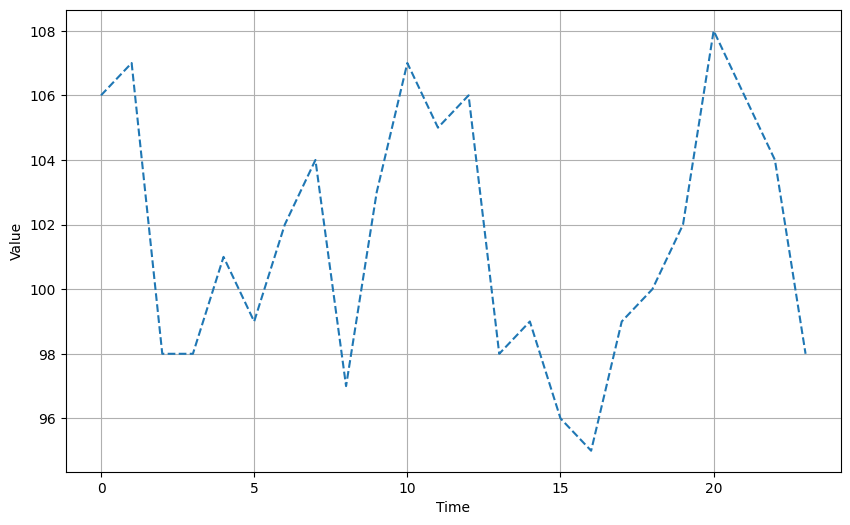

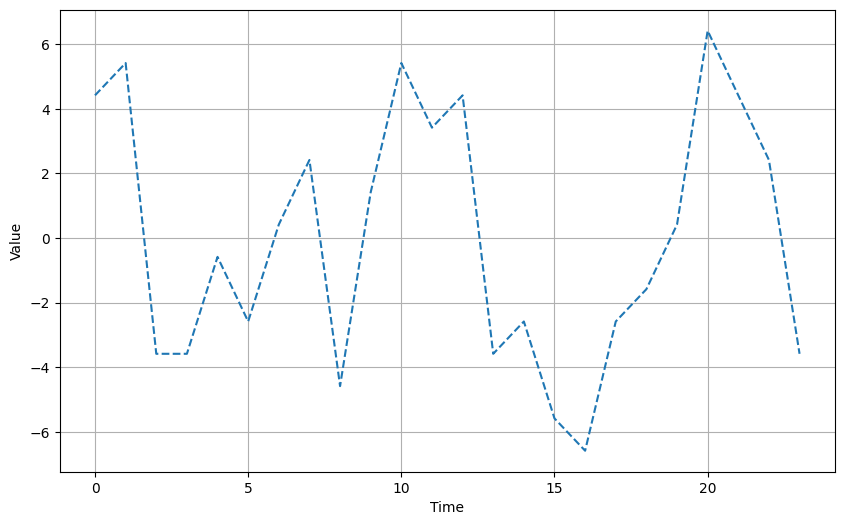

In [31]:
# Generate time steps. Assume 1 per day for one year (365 days)
time = np.arange(np.size(series))

dev_series = series - np.mean(series)

# Plot the results
plot_series(time, series)
plot_series(time, dev_series)

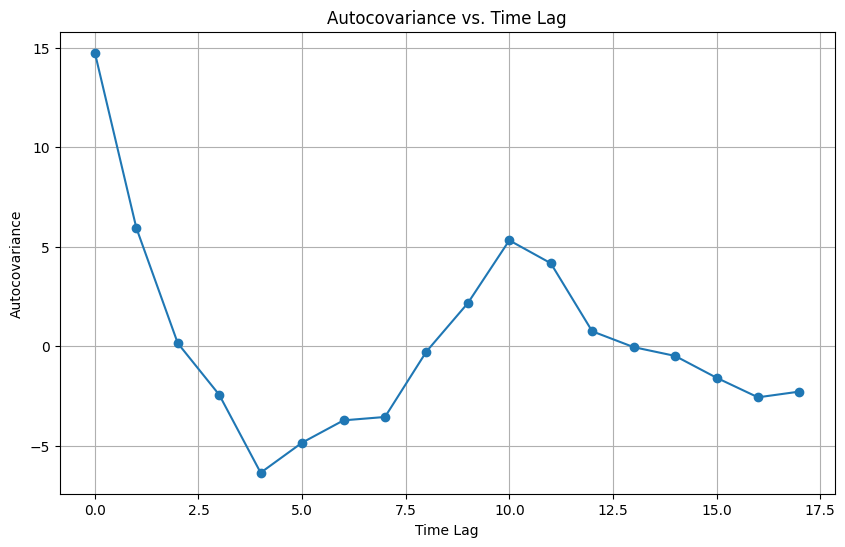

In [34]:
# Function to calculate autocovariance
def autocovariance(data, lag):
    n = len(data)
    mean = np.mean(data)
    autocov = 0
    for i in range(n - lag):
        autocov += (data[i] - mean) * (data[i + lag] - mean)
    autocov /= n
    return autocov

# Calculate autocovariance for different lags
lags = range(18)
autocovariances = [autocovariance(series, lag) for lag in lags]

# Plot autocovariance function vs. time lag
plt.figure(figsize=(10, 6))
plt.plot(lags, autocovariances, marker='o', linestyle='-')
plt.title('Autocovariance vs. Time Lag')
plt.xlabel('Time Lag')
plt.ylabel('Autocovariance')
plt.grid(True)
plt.show()

Partielle Autokorrelationsfunktion:
Lag 0: 1.0000
Lag 1: 0.4211
Lag 2: -0.1958
Lag 3: -0.1921
Lag 4: -0.5262
Lag 5: 0.0418
Lag 6: -0.2640
Lag 7: -0.3488
Lag 8: -0.1259
Lag 9: 0.1387
Lag 10: 0.6216


<Figure size 1000x600 with 0 Axes>

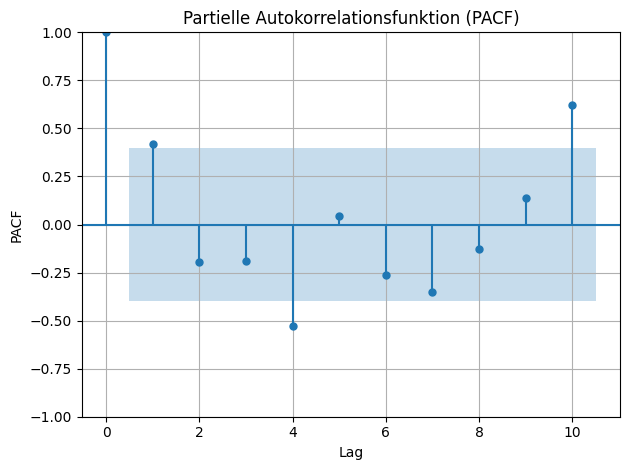

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import pacf
import statsmodels.api as sm

# Die gegebene Zeitreihe
series = [106, 107, 98, 98, 101, 99, 102, 104, 97, 103, 107, 105, 106, 98, 99, 96, 95, 99, 100, 102, 108, 106, 104, 98]

# Umwandlung in eine Pandas-Serie für bessere Handhabung
ts = pd.Series(series)

# Berechnung der partiellen Autokorrelationsfunktion
pacf_values = pacf(ts, nlags=10, method='ols')

# Ausgabe der PACF-Werte
print("Partielle Autokorrelationsfunktion:")
for i, value in enumerate(pacf_values):
    print(f"Lag {i}: {value:.4f}")

# Visualisierung der PACF
plt.figure(figsize=(10, 6))
sm.graphics.tsa.plot_pacf(ts, lags=10, method='ols')
plt.title('Partielle Autokorrelationsfunktion (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.grid(True)
plt.tight_layout()
plt.show()

Autocorrelation Function:
Lag 0: 1.0000
Lag 1: 0.4032
Lag 2: 0.0101
Lag 3: -0.1656
Lag 4: -0.4313
Lag 5: -0.3289
Lag 6: -0.2528
Lag 7: -0.2413
Lag 8: -0.0183
Lag 9: 0.1468
Lag 10: 0.3606


<Figure size 1000x600 with 0 Axes>

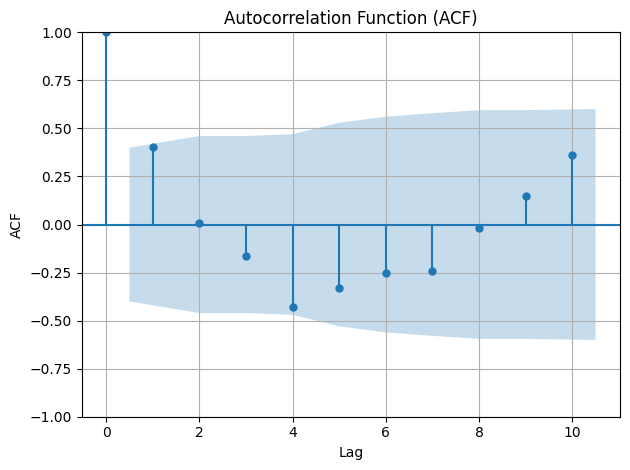

In [38]:
from statsmodels.tsa.stattools import acf
import statsmodels.api as sm

# Calculate ACF
acf_values = acf(ts, nlags=10)

# Print ACF values
print("Autocorrelation Function:")
for i, value in enumerate(acf_values):
    print(f"Lag {i}: {value:.4f}")

# Plot ACF
plt.figure(figsize=(10, 6))
sm.graphics.tsa.plot_acf(ts, lags=10)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
plt.tight_layout()
plt.show()
